In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target, name="species")
species_names = iris.target_names

In [3]:
df = X.copy()
df["species"] = y.map({i: name for i, name in enumerate(species_names)})
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [6]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


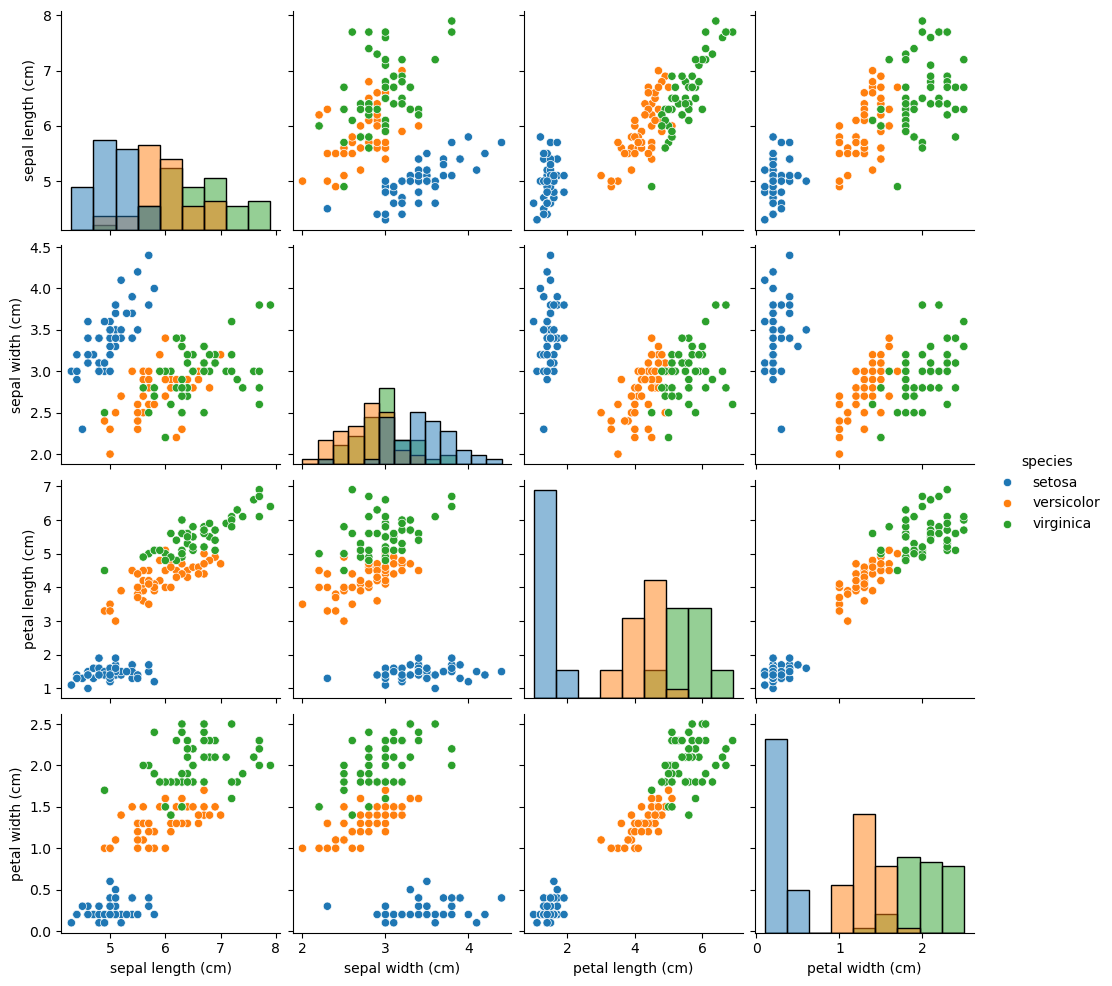

In [7]:
sns.pairplot(df, hue="species", diag_kind="hist")
plt.show()

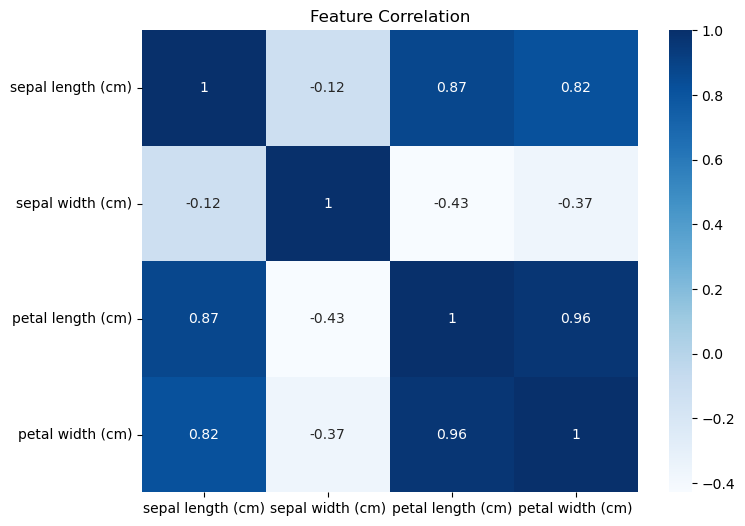

In [8]:
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns="species").corr(), annot=True, cmap="Blues")
plt.title("Feature Correlation")
plt.show()

### Model Traning

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [15]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [16]:
models = {
    "Logistic Regression": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", LogisticRegression(max_iter=1000))
    ]),
    "SVM (RBF)": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", SVC(kernel="rbf"))
    ]),
    "Decision Tree": DecisionTreeClassifier(max_depth=4),
    "KNN": Pipeline([
        ("scaler", StandardScaler()),
        ("clf", KNeighborsClassifier(n_neighbors=5))
    ])
}

In [17]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"{name} Accuracy: {acc:.2f}")

Logistic Regression Accuracy: 0.93
SVM (RBF) Accuracy: 0.97
Decision Tree Accuracy: 0.93
KNN Accuracy: 0.93


In [18]:
best_model_name, best_acc = sorted(results, key=lambda x: x[1], reverse=True)[0]
print(f"\nBest Model: {best_model_name} with Accuracy: {best_acc:.2f}")

best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Model: SVM (RBF) with Accuracy: 0.97

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30


Confusion Matrix:
[[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]


### Save and Deploy Model

In [19]:
import joblib
joblib.dump(best_model, "iris_model.joblib")
print("Model saved as iris_model.joblib")

Model saved as iris_model.joblib


In [20]:
import streamlit as st
import numpy as np
import joblib

st.title("🌸 Iris Flower Classifier")
st.write("Predict Setosa, Versicolor, or Virginica based on flower measurements.")

# Load model
model = joblib.load("iris_model.joblib")

# Input sliders
sepal_length = st.slider("Sepal length (cm)", 4.3, 7.9, 5.8)
sepal_width  = st.slider("Sepal width (cm)", 2.0, 4.4, 3.0)
petal_length = st.slider("Petal length (cm)", 1.0, 6.9, 4.3)
petal_width  = st.slider("Petal width (cm)", 0.1, 2.5, 1.3)

if st.button("Predict"):
    X = np.array([[sepal_length, sepal_width, petal_length, petal_width]])
    pred = model.predict(X)[0]
    names = ["Setosa", "Versicolor", "Virginica"]
    st.success(f"Prediction: {names[pred]}")

2025-12-28 16:04:44.863 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 16:04:45.106 
  command:

    streamlit run C:\Users\HP\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-12-28 16:04:45.107 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 16:04:45.109 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 16:04:45.112 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 16:04:45.114 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 16:04:45.115 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-12-28 16:04:45.123 Thread 'MainThread': missi